<a href="https://colab.research.google.com/github/RKRO-uns/Prog2kakushin/blob/main/work1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

広島の周辺の各県と各主要都市への往復料金のおよその金額を記述したファイルをダウンロードしてください。

In [1]:
%%file travel.csv
都道府県,新幹線,飛行機,夜行バス
北海道,-1,30000,-1
宮城県,50000,27000,25000
埼玉県,36000,-1,30000
千葉県,36000,-1,20000
東京都,36000,28000,20000
神奈川県,36000,-1,20000
新潟県,50000,-1,30000
静岡県,31000,-1,18000
愛知県,26000,-1,15000
京都府,22000,-1,10000
大阪府,20000,-1,10000
兵庫県,18000,-1,7000
鳥取県,-1,-1,7000
島根県,-1,-1,3000
岡山県,12000,-1,6000
山口県,12000,-1,6000
愛媛県,-1,-1,5000
香川県,-1,-1,5000
徳島県,-1,-1,7000
高知県,-1,-1,7000
福岡県,17000,-1,6000
鹿児島県,35000,-1,18000
沖縄県,-1,30000,-1

Writing travel.csv


広島から旅行先への行き方(乗り物)とその交通費(往復料金)を表示するプログラム

In [2]:
import pandas as pd
df = pd.read_csv('travel.csv')
print("条件の絞り方を決めてください")
print("1.場所のみ")
print("2.行き方のみ")
print("3.場所と行き方")
print("4.金額")
print("------------------")
z=int(input("数字のみを記入してください："))
if z==3:
  a=input("どこの県に行きますか？")
  b=input("何で行きますか？")
  if df[b][df["都道府県"].str.contains(a)].sum()==-1:
    print("データがありません")
  else:
    c=df[b][df["都道府県"].str.contains(a)].sum()
    print("およそ"+str(c)+"円です")
elif z==1:
  a=input("どこの県に行きますか？")
  df1=df[["新幹線","飛行機","夜行バス"]][df["都道府県"].str.contains(a)]
  print(df1)
  print("-1が表示された場合はデータないということです")
  b=input("何で行きますか？")
  c=df[b][df["都道府県"].str.contains(a)].sum()
  print("およそ"+str(c)+"円です")
elif z==2:
  b=input("何で行きますか？")
  df1=df[["都道府県",b]]
  print(df1)
  a=input("どこの県に行きますか？")
  c=df[b][df["都道府県"].str.contains(a)].sum()
  print("およそ"+str(c)+"円です")
else:
  b=int(input("最大金額："))
  d=df[["都道府県","新幹線"]][(df["新幹線"]<=b) & (df["新幹線"]>0)]
  e=df[["都道府県","飛行機"]][(df["飛行機"]<=b) & (df['飛行機']>0)]
  f=df[["都道府県","夜行バス"]][(df["夜行バス"]<=b) & (df['夜行バス']>0)]
  print(d)
  print(e)
  print(f)
  a=input("どこの県に行きますか？")
  b=input("何で行きますか？")
  c=df[b][df["都道府県"].str.contains(a)].sum()
  print("およそ"+str(c)+"円です")

条件の絞り方を決めてください
1.場所のみ
2.行き方のみ
3.場所と行き方
4.金額
------------------
数字のみを記入してください：3
どこの県に行きますか？北海道
何で行きますか？飛行機
およそ30000円です


旅費の計算(これ以上支出がない場合支出額を0としてください)

予算：100000
支出額：12000
支出額：20000
支出額：10000
支出額：15000
支出額：0
支出の合計：87000


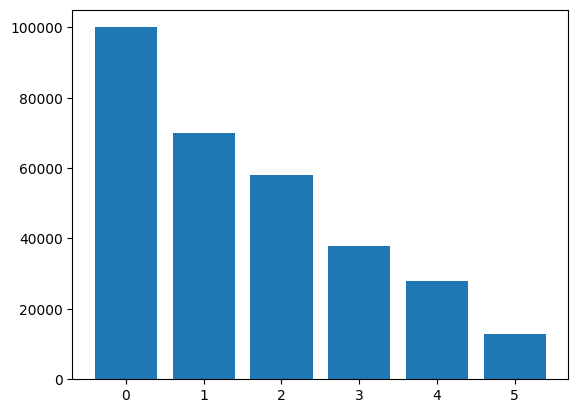

,予算,支出,差し引き残高
1,100000,30000,70000
2,70000,12000,58000
3,58000,20000,38000
4,38000,10000,28000
5,28000,15000,13000
6,13000,0,13000


In [6]:
from matplotlib import pyplot as plt
a=int(input("予算："))
df1 = pd.DataFrame([ [0, 0, 0] ])
df1.columns = ['予算', '支出', '差し引き残高']
new_row = {'予算':a, '支出':c, '差し引き残高':(a-c)}
df_new = pd.DataFrame(new_row, index=[0])
df1 = pd.concat([df1, df_new], ignore_index=True )
a=a-c
d=c
while True:
  b=int(input("支出額："))
  new_row = {'予算':a, '支出':b, '差し引き残高':(a-b)}
  df_new = pd.DataFrame(new_row, index=[0])
  df1 = pd.concat([df1, df_new], ignore_index=True )
  if a-b<0:
    print("足りません")
    break
  if b==0:
    break
  d+=b
  a=(a-b)

df1 = df1.drop(0)
df1
x=[]
for i in range(len(df1["予算"])):
  x.append(i)
print("支出の合計："+str(d))
plt.bar(x,df1["予算"])
plt.show()
df1